# 环境说明

In [2]:
# 安装所需的包
install.packages("rms")

package 'rms' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\AFAN\AppData\Local\Temp\RtmpqWt5eG\downloaded_packages


In [5]:
sessionInfo()

R version 4.4.1 (2024-06-14 ucrt)
Platform: x86_64-w64-mingw32/x64
Running under: Windows 11 x64 (build 22631)

Matrix products: default


locale:
[1] LC_COLLATE=Chinese (Simplified)_China.utf8 
[2] LC_CTYPE=Chinese (Simplified)_China.utf8   
[3] LC_MONETARY=Chinese (Simplified)_China.utf8
[4] LC_NUMERIC=C                               
[5] LC_TIME=Chinese (Simplified)_China.utf8    

time zone: Asia/Shanghai
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] digest_0.6.37     IRdisplay_1.1     utf8_1.2.4        base64enc_0.1-3  
 [5] fastmap_1.2.0     glue_1.8.0        htmltools_0.5.8.1 repr_1.1.7       
 [9] lifecycle_1.0.4   cli_3.6.3         fansi_1.0.6       vctrs_0.6.5      
[13] pbdZMQ_0.3-13     compiler_4.4.1    tools_4.4.1       evaluate_1.0.1   
[17] pillar_1.9.0      crayon_1.5.3      rlang_1.1.4       jsonlite_1.8.9   
[21] IRkernel_1.3.2    uuid_1.2-1  

# 代码实现

In [7]:
# 加载所需的包
library(pROC)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



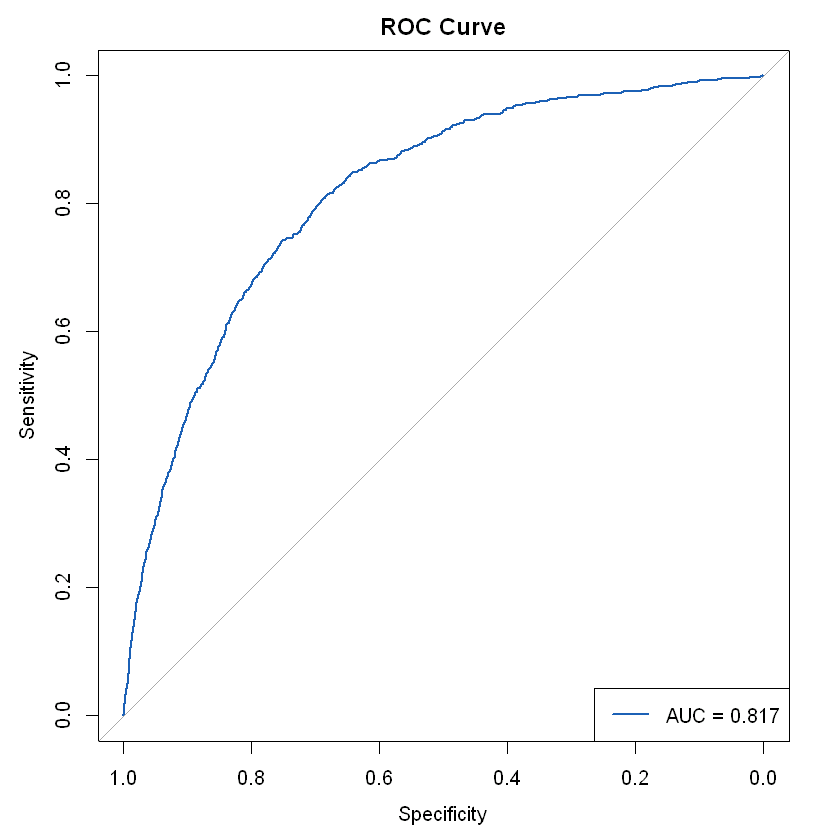

In [9]:
# 读取数据
data <- read.csv("data/predict.csv")

# 创建ROC曲线
roc_obj <- roc(data$origin_encoder, data$predict_probability)

# 绘制ROC曲线
plot(roc_obj, main="ROC Curve", col="#1c61b6", lwd=2)

# 添加AUC值
auc_value <- auc(roc_obj)
legend("bottomright", legend=paste("AUC =", round(auc_value, 4)), col="#1c61b6", lwd=2)

In [8]:
# 安装 & 加载 rms 包
install.packages("rms")  # 如果未安装
library(rms)

# 1️⃣ **假设你已经有了回归系数**
df_coef <- data.frame(
  Variable = c("Age", "BP", "Cholesterol"),
  Coefficient = c(0.03, 0.8, 1.2),  # 你计算的回归系数
  Min = c(20, 90, 150),  # 每个变量的最小值
  Max = c(80, 180, 300), # 每个变量的最大值
  Points = c(100, 80, 60) # 最高得分（自定义）
)

# 2️⃣ **创建一个空的 Design 库（不需要实际模型）**
dd <- datadist(df_coef)
options(datadist = "dd")

# 3️⃣ **构造 Nomogram**
nom <- nomogram(
  fun = function(x) x,  # 这里用恒等映射，你可以改成你自己的公式
  fun.at = seq(0, 1, by = 0.2),  # 分数刻度
  funlabel = "Risk Score",  # 预测值标签
  lp = FALSE  # 不需要线性预测器
)

# 4️⃣ **绘制 Nomogram**
plot(nom, xfrac = 0.5)  # xfrac 调整宽度